In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = ["Arial"]
plt.rcParams['font.size'] = 14

In [3]:
CN_AD_folds_data_neighbor = [
    {'MCC': 0.6823729747055391, 'Accuracy': 0.8507462686567164, 'Precision': 0.8518920548771295},
    {'MCC': 0.7163279717599775, 'Accuracy': 0.8636363636363636, 'Precision': 0.8702408702408704},
    {'MCC': 0.704550312668966, 'Accuracy': 0.8484848484848485, 'Precision': 0.866750453847228},
    {'MCC': 0.7343344667793078, 'Accuracy': 0.8636363636363636, 'Precision': 0.8716222049555383},
    {'MCC': 0.6375355777548621, 'Accuracy': 0.8181818181818182, 'Precision': 0.8193548387096774}
]

In [4]:
CN_AD_folds_data_weights = [
    {'MCC': 0.8434032060389335, 'Accuracy': 0.9253731343283582, 'Precision': 0.9274969028375907},
    {'MCC': 0.8731534676229477, 'Accuracy': 0.9393939393939394, 'Precision': 0.9421328671328671},
    {'MCC': 0.9096846334879913, 'Accuracy': 0.9545454545454546, 'Precision': 0.9594155844155844},
    {'MCC': 0.8786764705882353, 'Accuracy': 0.9393939393939394, 'Precision': 0.9393939393939394},
    {'MCC': 0.819688599970537, 'Accuracy': 0.9090909090909091, 'Precision': 0.9105990783410137}
]

In [18]:
CN_AD_folds_data = [
    {'MCC': 0.8742806866361467, 'Accuracy': 0.9402985074626866, 'Precision': 0.9411373365729492},
    {'MCC': 0.8731534676229477, 'Accuracy': 0.9393939393939394, 'Precision': 0.9421328671328671},
    {'MCC': 0.9096846334879913, 'Accuracy': 0.9545454545454546, 'Precision': 0.9594155844155844},
    {'MCC': 0.8985972192062409, 'Accuracy': 0.9342424242424242, 'Precision': 0.9345636084345762},
    {'MCC': 0.8488746876271654, 'Accuracy': 0.9342424242424242, 'Precision': 0.9346323529411764}
]

In [31]:
# 计算MCC的均值
mcc_values = [item['MCC'] for item in CN_AD_folds_data]
mcc_mean = sum(mcc_values) / len(mcc_values)

mcc_mean

0.8809181389160985

In [ ]:
69.50%、86.49%、88.09%

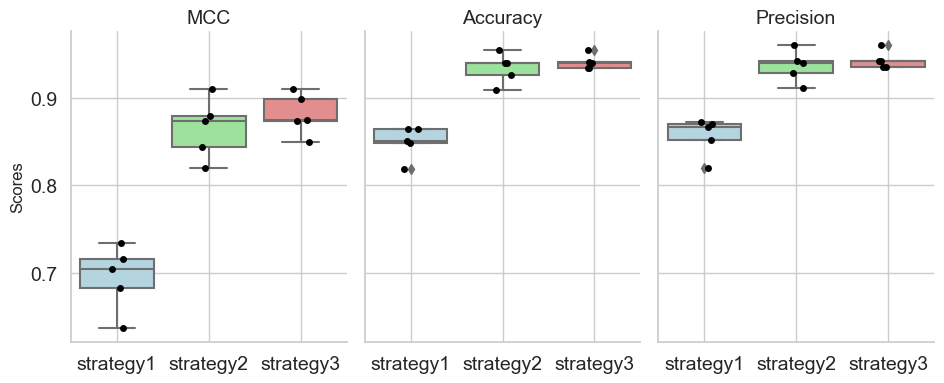

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据准备
neighbor_df = pd.DataFrame(CN_AD_folds_data_neighbor)
weight_df = pd.DataFrame(CN_AD_folds_data_weights)
# GCNs_df = pd.DataFrame(CN_AD_folds_data_2GCN)
CN_AD_df = pd.DataFrame(CN_AD_folds_data)

# 为数据添加组标签
neighbor_df['Group'] = 'strategy1'
weight_df['Group'] = 'strategy2'
# GCNs_df['Group'] = 'strategy 3'
CN_AD_df['Group'] = 'strategy3'

# 合并数据集
combined_df = pd.concat([neighbor_df, weight_df, CN_AD_df])

# 转换数据为长格式，便于绘图
combined_long = combined_df.melt(id_vars=["Group"], var_name="Metric", value_name="Score")

# 设置图形样式
sns.set(style="whitegrid")

# 使用 FacetGrid 按 Metric 分组绘制图形
g = sns.FacetGrid(combined_long, col="Metric", height=4, aspect=0.8, col_wrap=3)
g.map_dataframe(sns.boxplot, x='Group', y='Score', palette=['lightblue', 'lightgreen', 'lightcoral'])#,'lavender'
g.map_dataframe(sns.stripplot, x='Group', y='Score', color='black', jitter=True, size=5)

# 设置图形标题和标签
g.set_titles("{col_name}")
g.set_axis_labels("", "Scores")
for ax in g.axes.flat:
    # 设置刻度字体大小
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel("")
    ax.set_title(ax.get_title(), fontsize=14)
    ax.xaxis.grid(True)  
    #ax.yaxis.grid(True)# 添加水平网格线
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# # 添加自定义图例
# legend_elements = [
#     Patch(facecolor='lightblue', edgecolor='black', label='strategy1'),
#     Patch(facecolor='lightgreen', edgecolor='black', label='strategy2'),
#     Patch(facecolor='lightcoral', edgecolor='black', label='strategy3')
# ]
# plt.legend(handles=legend_elements, title="strategy", loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

plt.tight_layout()
plt.show()
